<a href="https://colab.research.google.com/github/cleziac/Contact-Process-Project/blob/main/Contact_process_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contact process: implementations and simulations. 

Let $ G = (V, E) $ be an undirected graph. The contact process is a discrete Markov chain with state space $ S := \{{0, 1}\}^V $. So $ x \in S$ means $ x = (x_i)_{i \in V}.$ If $x_i$ = 1 we say vertex $i$ is infected, if $x_i = 0$ we say vertex $i$ is susceptible.
The dynamics are as follows. Here $\lambda$ is a positive parameter. At any time step:

- Choose a vertex $i \in V$ at random with equal probability.
    - If $X_i = 0$ then nothing happens.
    - If $x_i = 1$ then choose a neighbor $j$ of $i$, with equal probability. 
        - With probability $1 /(1+\lambda)$ update $x_i$ to the value 0;
        - With probability $\lambda /(1+\lambda)$ update $x_j$ to the value 1 (in the case $x_j = 1$ then nothing happens).
- Proceed to the next step. 

As initial state you may take the state in which all vertices are infected. This Markov chain stops as it reaches the absorbing state in which all vertices are susceptible. We denote by $T$ the time needed to reach the absorbing state. 

The project consists in the following. First choose your favorite graph with $n$ vertices, e.g. the discrete ring. Then make $N$ independent simulations of the process, and denote by $T_k$ the absorption time for the $k-th$ simulation. Then, by the law of large numbers

$\overline{T} = \frac{1}{N}\sum_{k = 1}^{N} T_k$

is an estimate for $E(T)$. By several simulations and suitable plots, determine:
- How $\overline{T}$ depends on $\lambda$; you should be able to identify two regimes: for $\lambda$ small enough, $\overline{T}$ is also small, while $\overline{T}$ grows fast as $\lambda$ crosses a critical value $\lambda_c$.
- (optional) for different values of $\lambda$ (larger or smaller than $\lambda_c$) determine how $\overline{T}$ depends on the number of $n$ vertices. 

In [1]:
# import of libraries

import numpy as np
import pandas as pd
import networkx as nx
import os
import timeit
import matplotlib.pyplot as plt

In [28]:
# definition of the first function that, given a dimension N and a 
# percentage perc, returns a discrete ring of that given dimension
# where a number of nodes at random are infected

def build_ring(N, perc):                            # N = number of nodes and perc is the percentage of 
                                                    # initially infected nodes. 
    mat = np.zeros((N, N), dtype = int)             # returns a NxN matrix filled with 0s
    for i in range(1, mat.shape[0] - 1):            # filling with 1s the nodes in the positions [1, ..., N - 1]
        mat[i][i - 1] = 1
        mat[i][i + 1] = 1
    mat[0][1] = 1                                   # filling with 1s the nodes in the positions 0 and N (can't cycle on them)
    mat[0][-1] = 1
    mat[-1][0] = 1
    mat[-1][-2] = 1
    
    initially_susceptible = np.full(N, 'S')         # returns a new array of given shape (N) and type, filled with fill_value ('S')
    initially_infected = int(N*perc)                # ratio of infected nodes
    for i in range(initially_infected):             
        initially_susceptible[i] = 'I'                              
    return mat, initially_susceptible

In [24]:
# definition of the function that, given an adjacency matrix and 
# an initial distribution, provides the visual representation of the graph. 

def plot_graph(mat, initially_susceptible):                         
    G = nx.from_numpy_array(mat)
    color = np.full(len(initially_susceptible), ['blue'])           # susceptible nodes in blue
    
    for i in range(len(initially_susceptible)):
        if initially_susceptible[i] == 'I':
                    color[i] = 'red'                                # infected nodes in red
    nx.draw(G, node_color = color)
    return

In [4]:
# definition of the actual contact process algorithm

def contact_process(matrix, initial_distribution, lambda_p):
    N = matrix.shape[0]
    V = matrix.shape[1]
    tic = timeit.default_timer()
    while(np.any(initial_distribution == 'I')):                     # while there are infected vertices
        row_number = np.random.randint(0, N)                        # select a random vertex
        if initial_distribution[row_number] == 'S':                 # if the vertex is susceptible => nothing happens
            continue
        else:                                                       # the vertex selected is infected => pick a neighbor vertex
            if row_number == 0:
                neighbor = np.random.choice([initial_distribution[row_number + 1], initial_distribution[V - 1]])
            elif row_number == V:
                neighbor = np.random.choice([initial_distribution[0], initial_distribution[row_number - 1]])
            else:
                neighbor = np.random.choice([initial_distribution[row_number - 1], initial_distribution[row_number]], 1)
            
            update_prob = np.random.choice(2, 1, p = [1/(1+lambda_p), lambda_p/(1+lambda_p)])
            if update_prob == 0:  # first choice => node becomes susceptible
                initial_distribution[row_number] = 'S'
            else:                 # second choice => node stays infected and nothing happens 
                continue
    toc = timeit.default_timer()
    T = toc - tic
    return T

# Benchmarks and tests to time how long it takes to reach convergence. 

Test 1: graph with **10 nodes** and an **initial distribution of 1**, meaning that all nodes start as infected. 

['I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I']


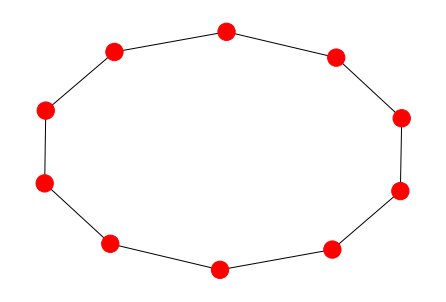

In [31]:
one, initially_sus = build_ring(10, 1)
print(initially_sus)
plot_graph(one, initially_sus)

Graph at the end of the process, when all the states are susceptible. 

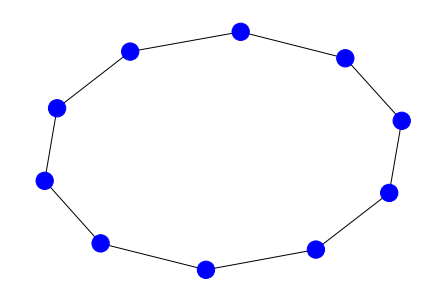

In [32]:
one, initially_sus = build_ring(10, 1)
T_test = contact_process(one, initially_sus, 1)
plot_graph(one, initially_sus)

In [33]:
one, initially_sus = build_ring(10, 1)
T1 = contact_process(one, initially_sus, 1)
print(T1)

0.003294173000540468


In [34]:
one, initially_sus = build_ring(10, 1)
T2 = contact_process(one, initially_sus, 2)
print(T2)

0.007752851000077499


In [35]:
one, initially_sus = build_ring(10, 1)
T10 = contact_process(one, initially_sus, 10)
print(T10)

0.015790995999850566


In [36]:
one, initially_sus = build_ring(10, 1)
T20 = contact_process(one, initially_sus, 20)
print(T20)

0.035583062000114296


In [37]:
one, initially_sus = build_ring(10, 1)
T50 = contact_process(one, initially_sus, 50)
print(T50)

0.0611610779997136


In [38]:
one, initially_sus = build_ring(10, 1)
T60 = contact_process(one, initially_sus, 60)
print(T60)

0.058442173000003095


In [39]:
one, initially_sus = build_ring(10, 1)
T80 = contact_process(one, initially_sus, 80)
print(T80)

0.13273851400026615


In [40]:
one, initially_sus = build_ring(10, 1)
T1000 = contact_process(one, initially_sus, 1000)
print(T1000)

1.9453608650001115


In [41]:
one, initially_sus = build_ring(10, 1)
T2000 = contact_process(one, initially_sus, 2000)
print(T2000)

1.5712766599999668


Test 2: graph with **25 nodes** and an **initial distribution of 1**, meaning that all nodes start as infected.

['I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I'
 'I' 'I' 'I' 'I' 'I' 'I' 'I']


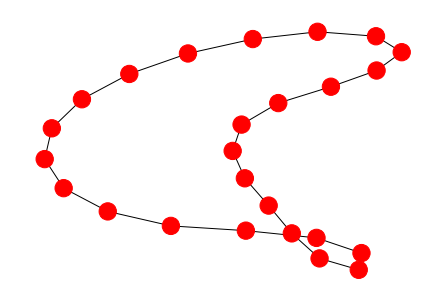

In [29]:
two, initially_sus = build_ring(25, 1)
print(initially_sus)
plot_graph(two, initially_sus)

Graph at the end of the process, when all states are susceptible again. 

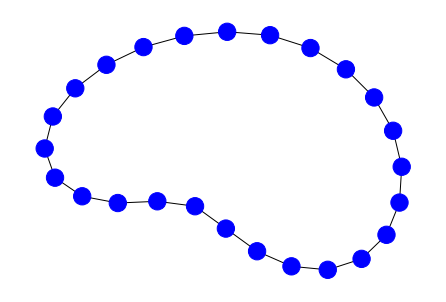

In [30]:
two, initially_sus = build_ring(25, 1)
T_test = contact_process(two, initially_sus, 1)
plot_graph(two, initially_sus)

Test to compute timings. 

In [42]:
two, initially_sus = build_ring(25, 1)
T11 = contact_process(two, initially_sus, 1)
print(T11)

0.008812000000034459


In [43]:
two, initially_sus = build_ring(25, 1)
T22 = contact_process(two, initially_sus, 2)
print(T22)

0.05100449099973048


In [44]:
two, initially_sus = build_ring(25, 1)
T33 = contact_process(two, initially_sus, 10)
print(T33)

0.048884908000218275


In [45]:
two, initially_sus = build_ring(25, 1)
T44 = contact_process(two, initially_sus, 20)
print(T44)

0.056680982999750995


In [46]:
two, initially_sus = build_ring(25, 1)
T55 = contact_process(two, initially_sus, 50)
print(T55)

0.17192118299954018


In [47]:
two, initially_sus = build_ring(25, 1)
T66 = contact_process(two, initially_sus, 60)
print(T66)

0.2296649689997139


In [48]:
two, initially_sus = build_ring(25, 1)
T77 = contact_process(two, initially_sus, 80)
print(T77)

0.2657322559998647


In [49]:
two, initially_sus = build_ring(25, 1)
T88 = contact_process(two, initially_sus, 1000)
print(T88)

1.9277154920000612


In [50]:
two, initially_sus = build_ring(25, 1)
T99 = contact_process(two, initially_sus, 2000)
print(T99)

3.3610951900000146


Test 3: the discrete ring has now 50 nodes with the same initial distribution as before. 

In [51]:
three, initially_sus = build_ring(50, 1)
T111 = contact_process(three, initially_sus, 1)
print(T111)

0.02564470400011487


In [52]:
three, initially_sus = build_ring(50, 1)
T222 = contact_process(three, initially_sus, 2)
print(T222)

0.025606043000152567


In [53]:
three, initially_sus = build_ring(50, 1)
T333 = contact_process(three, initially_sus, 10)
print(T333)

0.10925019400019664


In [54]:
three, initially_sus = build_ring(50, 1)
T444 = contact_process(three, initially_sus, 20)
print(T444)

0.2828923390006821


In [55]:
three, initially_sus = build_ring(50, 1)
T555 = contact_process(three, initially_sus, 50)
print(T555)

0.48458683300032135


In [56]:
three, initially_sus = build_ring(50, 1)
T666 = contact_process(three, initially_sus, 60)
print(T666)

0.5558507039995675


In [57]:
three, initially_sus = build_ring(50, 1)
T777 = contact_process(three, initially_sus, 80)
print(T777)

0.47903711200069665


In [58]:
three, initially_sus = build_ring(50, 1)
T888 = contact_process(three, initially_sus, 1000)
print(T888)

7.9920616190001965


In [59]:
three, initially_sus = build_ring(50, 1)
T999 = contact_process(three, initially_sus, 2000)
print(T999)

15.844543920999968


Test 4: the graph now has 100 nodes, the distribution is the same. 

In [60]:
four, initially_sus = build_ring(100, 1)
T1111 = contact_process(four, initially_sus, 1)
print(T1111)

0.06962170099996001


In [61]:
four, initially_sus = build_ring(100, 1)
T2222 = contact_process(four, initially_sus, 2)
print(T2222)

0.07741813699976774


In [62]:
four, initially_sus = build_ring(100, 1)
T3333 = contact_process(four, initially_sus, 10)
print(T3333)

0.27994843699980265


In [63]:
four, initially_sus = build_ring(100, 1)
T4444 = contact_process(four, initially_sus, 20)
print(T4444)

0.4832053589998395


In [64]:
four, initially_sus = build_ring(100, 1)
T5555 = contact_process(four, initially_sus, 50)
print(T5555)

1.4103010939998057


In [65]:
four, initially_sus = build_ring(100, 1)
T6666 = contact_process(four, initially_sus, 60)
print(T6666)

1.94056394800009


In [66]:
four, initially_sus = build_ring(100, 1)
T7777 = contact_process(four, initially_sus, 80)
print(T7777)

1.3811517240001194


In [67]:
four, initially_sus = build_ring(100, 1)
T8888 = contact_process(four, initially_sus, 1000)
print(T8888)

12.051127714999893


In [68]:
four, initially_sus = build_ring(100, 1)
T9999 = contact_process(four, initially_sus, 2000)
print(T9999)

30.855308895000235


Test 5: the graph has now 500 nodes, with the same distribution of 1, meaning all nodes start as infected. 

In [69]:
five, initially_sus = build_ring(500, 1)
T15 = contact_process(five, initially_sus, 1)
print(T15)

0.4080715609998151


In [70]:
five, initially_sus = build_ring(500, 1)
T25 = contact_process(five, initially_sus, 2)
print(T25)

0.30556913200052804


In [71]:
five, initially_sus = build_ring(500, 1)
T35 = contact_process(five, initially_sus, 10)
print(T35)

1.341334894999818


In [72]:
five, initially_sus = build_ring(500, 1)
T45 = contact_process(five, initially_sus, 20)
print(T45)

1.886852792999889


In [73]:
five, initially_sus = build_ring(500, 1)
T55 = contact_process(five, initially_sus, 50)
print(T55)

6.5306026749995


In [74]:
five, initially_sus = build_ring(500, 1)
T65 = contact_process(five, initially_sus, 60)
print(T65)

6.815212653000344


In [75]:
five, initially_sus = build_ring(500, 1)
T75 = contact_process(five, initially_sus, 80)
print(T75)

7.9922727250004755


In [76]:
five, initially_sus = build_ring(500, 1)
T85 = contact_process(five, initially_sus, 1000)
print(T85)

140.5930928529997


In [77]:
five, initially_sus = build_ring(500, 1)
T95 = contact_process(five, initially_sus, 2000)
print(T95)

217.7777634009999


# Excution times on a discrete ring:

| # nodes | lambda | Execution time | 
|---------|---------|-------------|
| 10      |   1     | 0.003294173000540468|
| 10 | 2 | 0.007752851000077499 |
| 10 | 10 | 0.015790995999850566 |
| 10 | 20 | 0.035583062000114296 |
| 10 | 50 | 0.0611610779997136 |
| 10 | 60 | 0.058442173000003095|
| 10 | 80 | 0.13273851400026615|
| 10 | 1000 | 1.9453608650001115|
| 10 | 2000 | 1.5712766599999668|
| 25      |   1     | 0.008812000000034459|
| 25 | 2 | 0.05100449099973048 |
| 25 | 10 | 0.048884908000218275 |
| 25 | 20 | 0.056680982999750995 |
| 25 | 50 | 0.17192118299954018 |
| 25 | 60 | 0.2296649689997139|
| 25 | 80 | 0.2657322559998647|
| 25 | 1000 | 1.9277154920000612|
| 25 | 2000 | 1.9277154920000612|
| 50      |   1     | 0.02564470400011487|
| 50 | 2 | 0.025606043000152567 |
| 50 | 10 | 0.10925019400019664 |
| 50 | 20 | 0.2828923390006821 |
| 50 | 50 | 0.48458683300032135 |
| 50 | 60 | 0.5558507039995675|
| 50 | 80 | 0.47903711200069665|
| 50 | 1000 | 7.9920616190001965
| 50 | 2000 | 7.9920616190001965|
| 100      |   1     | 0.06962170099996001|
| 100 | 2 | 0.07741813699976774 |
| 100 | 10 | 0.27994843699980265 |
| 100 | 20 | 0.4832053589998395 |
| 100 | 50 | 1.4103010939998057 |
| 100 | 60 | 1.94056394800009|
| 100 | 80 | 1.3811517240001194|
| 100 | 1000 | 12.051127714999893
| 100 | 2000 | 30.855308895000235|
| 500      |   1     | 0.4080715609998151|
| 500 | 2 | 0.30556913200052804 |
| 500 | 10 | 1.341334894999818 |
| 500 | 20 | 1.886852792999889 |
| 500 | 50 | 6.5306026749995 |
| 500 | 60 | 6.815212653000344|
| 500 | 80 | 7.9922727250004755|
| 500 | 1000 | 7.9922727250004755
| 500 | 2000 | 217.7777634009999|


# Contact process on a randomly generated graph

In [78]:
nodes = 40
probability = 0.5
G = nx.erdos_renyi_graph(nodes, probability)

In [79]:
adj_matrix = nx.adjacency_matrix(G)
adj_matrix = adj_matrix.todense()

In [80]:
def infection(matrix, perc):
  N = matrix.shape[0]
  initially_susceptible = np.full(N, 'S')         # returns a new array of given shape (N) and type, filled with fill_value ('S')
  initially_infected = int(N*perc)                # ratio of infected nodes
  for i in range(initially_infected):             # some infected nodes are going to be placed in random positions in the matrix
    initially_susceptible[i] = 'I'
  return initially_susceptible

In [81]:
initially_infected = infection(adj_matrix, 1)

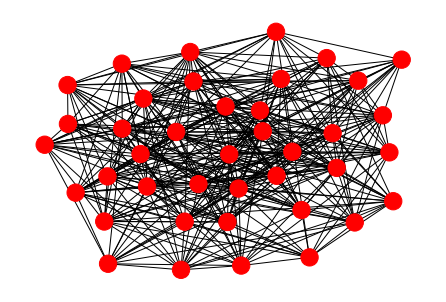

In [82]:
plot_graph(adj_matrix, initially_infected)

In [83]:
G = nx.erdos_renyi_graph(nodes, probability)
adj_matrix = nx.adjacency_matrix(G)
adj = adj_matrix.todense()
init_inf = infection(adj, 1)
T1X = contact_process(adj, init_inf, 1)
print(T1X)

0.03530746900014492


In [84]:
G = nx.erdos_renyi_graph(nodes, probability)
adj_matrix = nx.adjacency_matrix(G)
adj = adj_matrix.todense()
init_inf = infection(adj, 1)
T2X = contact_process(adj, init_inf, 2)
print(T2X)

0.029970786000376393


In [85]:
G = nx.erdos_renyi_graph(nodes, probability)
adj_matrix = nx.adjacency_matrix(G)
adj = adj_matrix.todense()
init_inf = infection(adj, 1)
T3X = contact_process(adj, init_inf, 10)
print(T3X)

0.12127000399959798


In [86]:
G = nx.erdos_renyi_graph(nodes, probability)
adj_matrix = nx.adjacency_matrix(G)
adj = adj_matrix.todense()
init_inf = infection(adj, 1)
T4X = contact_process(adj, init_inf, 50)
print(T4X)

0.2153140540003733


In [87]:
G = nx.erdos_renyi_graph(nodes, probability)
adj_matrix = nx.adjacency_matrix(G)
adj = adj_matrix.todense()
init_inf = infection(adj, 1)
T5X = contact_process(adj, init_inf, 100)
print(T5X)

1.3220406979999098


In [88]:
G = nx.erdos_renyi_graph(nodes, probability)
adj_matrix = nx.adjacency_matrix(G)
adj = adj_matrix.todense()
init_inf = infection(adj, 1)
T6X = contact_process(adj, init_inf, 500)
print(T6X)

2.307287257000098


In [89]:
G = nx.erdos_renyi_graph(nodes, probability)
adj_matrix = nx.adjacency_matrix(G)
adj = adj_matrix.todense()
init_inf = infection(adj, 1)
T7X = contact_process(adj, init_inf, 1000)
print(T7X)

5.695586826999715


In [90]:
G = nx.erdos_renyi_graph(nodes, probability)
adj_matrix = nx.adjacency_matrix(G)
adj = adj_matrix.todense()
init_inf = infection(adj, 1)
T8X = contact_process(adj, init_inf, 2000)
print(T8X)

10.234926473999622


In [91]:
G = nx.erdos_renyi_graph(nodes, probability)
adj_matrix = nx.adjacency_matrix(G)
adj = adj_matrix.todense()
init_inf = infection(adj, 1)
T9X = contact_process(adj, init_inf, 3000)
print(T9X)

16.01825774200006


# Graphs to better understand the behavior of the process



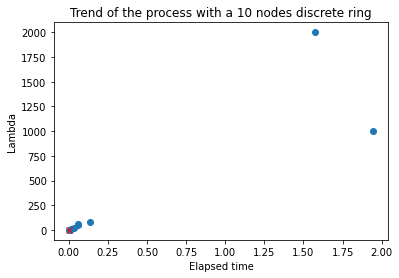

In [100]:
Tn = [T1, T2, T10, T20, T50, T60, T80, T1000, T2000]
a = np.array(Tn)
plt.xlabel('Elapsed time')
plt.ylabel('Lambda')
plt.title('Trend of the process with a 10 nodes discrete ring')
plt.plot(np.average(a), marker = 'x', color = 'red')
plt.scatter(a, y = [1, 2, 10, 20, 50, 60, 80, 1000, 2000])
plt.show()

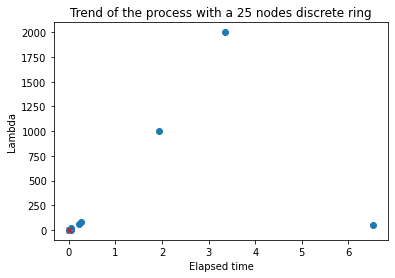

In [103]:
Tn = [T11, T22, T33, T44, T55, T66, T77, T88, T99]
a = np.array(Tn)
plt.xlabel('Elapsed time')
plt.ylabel('Lambda')
plt.title('Trend of the process with a 25 nodes discrete ring')
plt.plot(np.average(a), marker = 'x', color = 'red')
plt.scatter(a, y = [1, 2, 10, 20, 50, 60, 80, 1000, 2000])
plt.show()

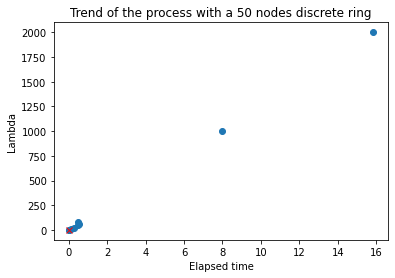

In [105]:
Tn = [T111, T222, T333, T444, T555, T666, T777, T888, T999]
a = np.array(Tn)
plt.xlabel('Elapsed time')
plt.ylabel('Lambda')
plt.title('Trend of the process with a 50 nodes discrete ring')
plt.plot(np.average(a), marker = 'x', color = 'red')
plt.scatter(a, y = [1, 2, 10, 20, 50, 60, 80, 1000, 2000])
plt.show()

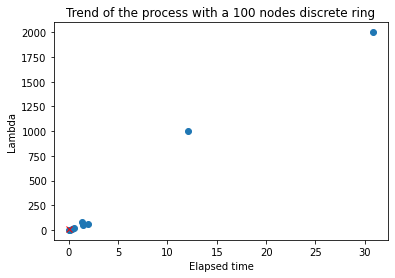

In [106]:
Tn = [T1111, T2222, T3333, T4444, T5555, T6666, T7777, T8888, T9999]
a = np.array(Tn)
plt.xlabel('Elapsed time')
plt.ylabel('Lambda')
plt.title('Trend of the process with a 100 nodes discrete ring')
plt.plot(np.average(a), marker = 'x', color = 'red')
plt.scatter(a, y = [1, 2, 10, 20, 50, 60, 80, 1000, 2000])
plt.show()

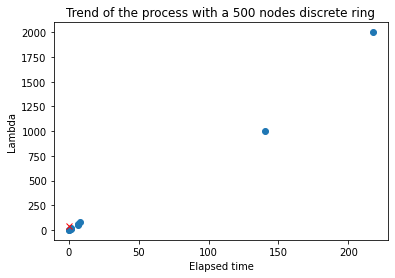

In [107]:
Tn = [T15, T25, T35, T45, T55, T65, T75, T85, T95]
a = np.array(Tn)
plt.xlabel('Elapsed time')
plt.ylabel('Lambda')
plt.title('Trend of the process with a 500 nodes discrete ring')
plt.plot(np.average(a), marker = 'x', color = 'red')
plt.scatter(a, y = [1, 2, 10, 20, 50, 60, 80, 1000, 2000])
plt.show()

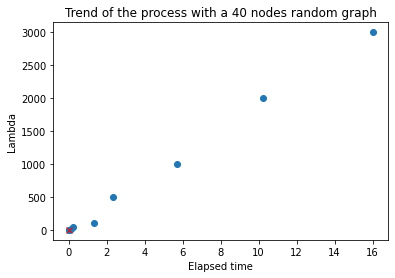

In [109]:
Tn = [T1X, T2X, T3X, T4X, T5X, T6X, T7X, T8X, T9X]
a = np.array(Tn)
plt.xlabel('Elapsed time')
plt.ylabel('Lambda')
plt.title('Trend of the process with a 40 nodes random graph')
plt.plot(np.average(a), marker = 'x', color = 'red')
plt.scatter(a, y = [1, 2, 10, 50, 100, 500, 1000, 2000, 3000])
plt.show()

# Conclusions.

The tests performed on different graphs provided two main facts: 
- When lambda is really small, the amount of time needed to complete the process is small, too. This goes for both a small graph and a bigger one. 
- The increase in lambda can only go so far, after a certain threshold the process takes too long to complete. This threshold is lower when the number of nodes grows. In short: bigger graphs have a lower lambda critic. 

Note: the algorithm works in a way that does converge with a probability on 1 in a finite amount of time, though the execution in itself is not deterministic. Two executions of the algorithm on the same graph can provide two different elapsed time results. This could both be given by the fact that the variables still in the cache part of the CPU, optimizing the result, or it could be that different choices were made in terms of neighbor chosen at random. 

The last test, on a "regular" graph of size n = 40 shows a slightly different behavior: given that each node has n/20 = 20 vertices to other 20 nodes, the lambda can increase more and the execution converges in a smaller amount of time than a bigger graph where each node has 2 neighbors (like the 500 nodes one). 